In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [307]:
def clean_rpe():
    
    pre = pd.read_csv('./data/rpe.csv',na_values=['None'])
    df = pre
    print('df shape is ', df.shape)
    
    # traing 
    df.Training = df.Training.replace('Yes', 1)
    df.Training = df.Training.replace('No', 0)
    
    # dummies for SessionType
    dummies= pd.get_dummies(df.SessionType, prefix='SessionType' )
    for col in list((dummies)):
        df.insert(4, col, dummies[col] )

    # for numeric cols, replace nan with mean for each player
    numeric_cols = [
        'Duration',
        'RPE',
        'SessionLoad',
        'DailyLoad',
        'AcuteLoad',
        'ChronicLoad',
        'AcuteChronicRatio',
        'ObjectiveRating',
        'FocusRating']
    
    for col in numeric_cols:
        for player in set(df.PlayerID):
            mean_ = (df[df.PlayerID == player][col].mean())
            df.update( df[df.PlayerID == player][col].fillna(mean_)) 
#             df[df.PlayerID == player][col] = df[df.PlayerID == player][col].replace(np.nan, mean_)
    # dummies for BestOutOfMyself
    dummies= pd.get_dummies(df.BestOutOfMyself, prefix='BestOutOfMyself' )
    for col in list((dummies)):
        df.insert(21, col, dummies[col] )

    df = df.drop(columns = ['SessionType','BestOutOfMyself'])
    df.head()
    return df

In [310]:
df.groupby('PlayerID').describe()

AcuteChronicRatio                                                \
                     count      mean       std   min       25%       50%   
PlayerID                                                                   
1                    576.0  0.959470  0.395861  0.01  0.900000  0.959470   
2                    575.0  1.058489  0.483472  0.08  0.940000  1.058489   
3                    607.0  0.986097  0.458434  0.08  0.780000  0.986097   
4                    408.0  1.065591  0.419124  0.08  1.057500  1.065591   
5                    289.0  1.283469  0.612647  0.06  1.100000  1.283469   
6                    496.0  1.082902  0.484448  0.11  1.017500  1.082902   
7                    620.0  0.971024  0.420822  0.15  0.840000  0.971024   
8                    518.0  1.054051  0.495237  0.05  0.920000  1.054051   
9                    414.0  1.067207  0.497689  0.16  0.880000  1.067207   
10                   544.0  1.032080  0.460843  0.12  0.917500  1.032080   
11                   740.0  0.998986  0.411670  0.17  0.937500  0.998986   
12                   372.0  1.104975  0.572114  0.03  0.850000  1.104975   
13                   809.0  0.964393  0.373511  0.09  0.964393  0.964393   
14                   415.0  1.123631  0.501210  0.07  1.123631  1.123631   
15                   306.0  1.336111  0.719767  0.05  1.102500  1.336111   
16                   768.0  0.963284  0.409334  0.07  0.930000  0.963284   
17                   403.0  1.268676  0.598970  0.05  1.060000  1.268676   

                         AcuteLoad             ...  SessionType_Strength       \
               75%   max     count        mean ...                   75%  max   
PlayerID                                       ...                              
1         0.959470  4.00     576.0  290.730795 ...                   0.0  1.0   
2         1.058489  4.00     575.0  315.598201 ...                   0.0  1.0   
3         0.986097  4.00     607.0  356.289459 ...                   0.0  1.0   
4         1.065591  4.00     408.0  326.574194 ...                   1.0  1.0   
5         1.283469  4.00     289.0  222.218367 ...                   1.0  1.0   
6         1.082902  4.01     496.0  360.475893 ...                   0.0  1.0   
7         0.971024  4.00     620.0  359.304819 ...                   0.0  1.0   
8         1.054051  4.00     518.0  364.228832 ...                   0.0  1.0   
9         1.067207  4.00     414.0  323.945946 ...                   0.0  1.0   
10        1.032080  4.00     544.0  274.732117 ...                   0.0  1.0   
11        0.998986  4.00     740.0  389.904638 ...                   0.0  1.0   
12        1.104975  4.02     372.0  188.482266 ...                   0.0  1.0   
13        0.964393  4.00     809.0  358.523121 ...                   0.0  1.0   
14        1.123631  4.00     415.0  306.443017 ...                   1.0  1.0   
15        1.336111  4.01     306.0  178.373611 ...                   0.0  1.0   
16        0.963284  4.00     768.0  316.062426 ...                   0.0  1.0   
17        1.268676  4.00     403.0  246.163725 ...                   0.0  1.0   

         Training                                               
            count      mean       std  min  25%  50%  75%  max  
PlayerID                                                        
1           576.0  0.819444  0.384984  0.0  1.0  1.0  1.0  1.0  
2           575.0  0.860870  0.346384  0.0  1.0  1.0  1.0  1.0  
3           607.0  0.785832  0.410582  0.0  1.0  1.0  1.0  1.0  
4           408.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
5           289.0  0.847751  0.359885  0.0  1.0  1.0  1.0  1.0  
6           496.0  0.899194  0.301376  0.0  1.0  1.0  1.0  1.0  
7           620.0  0.819355  0.385035  0.0  1.0  1.0  1.0  1.0  
8           518.0  0.851351  0.356086  0.0  1.0  1.0  1.0  1.0  
9           414.0  0.823671  0.381561  0.0  1.0  1.0  1.0  1.0  
10          544.0  0.851103  0.356315  0.0  1.0  1.0  1.0  1.0  
11          740.0  0.8

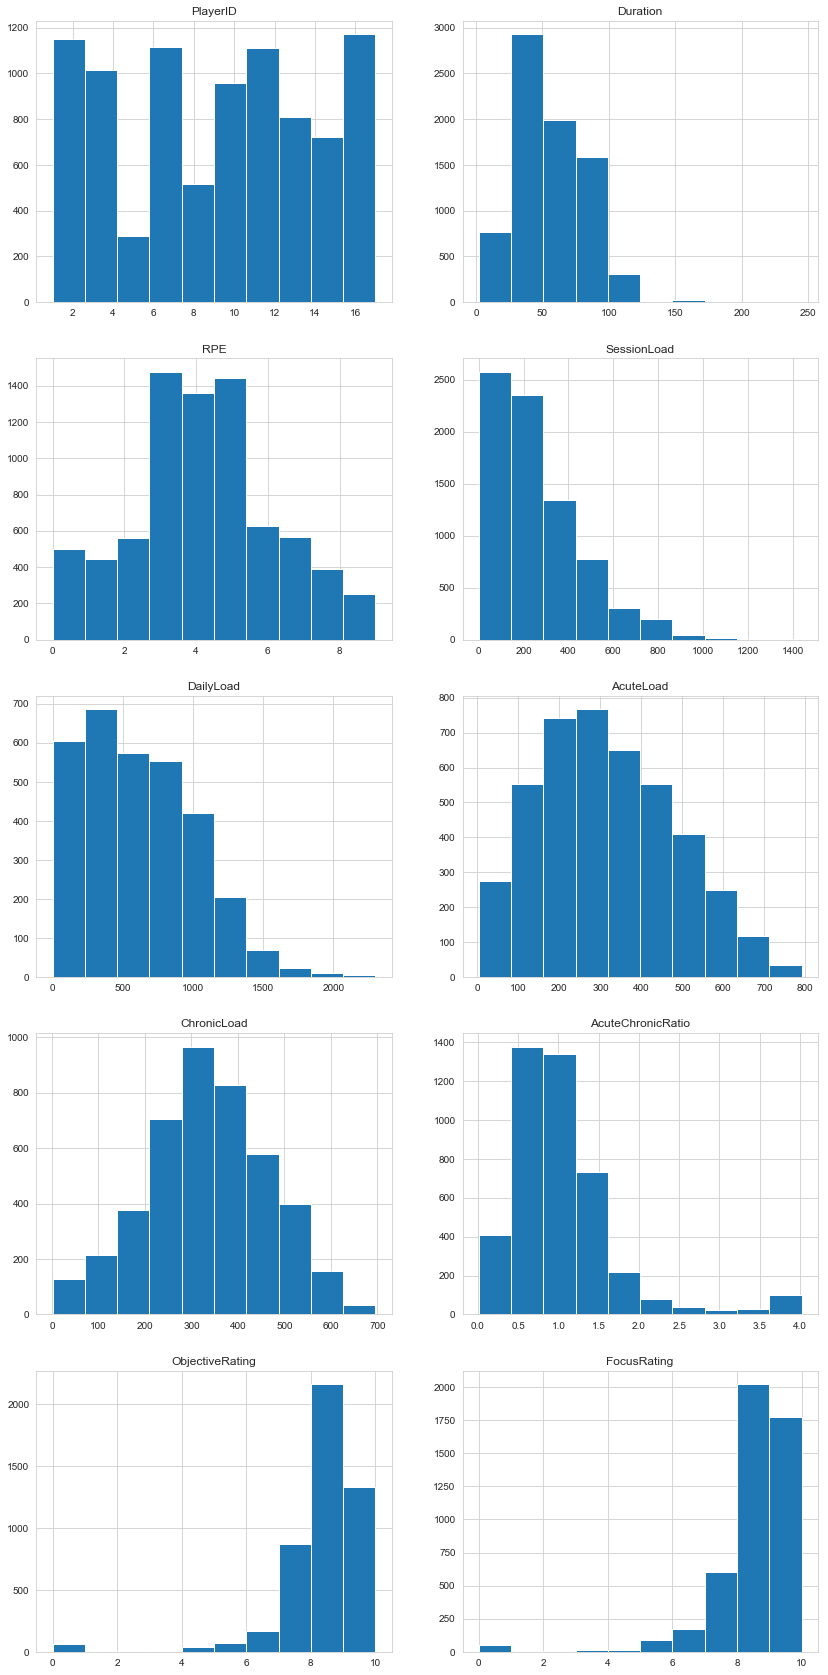

In [76]:
numeric_cols = list(df.describe().columns)
plt.figure(figsize = (14,30))
for n, col in enumerate(numeric_cols):
    ax = plt.subplot(5,2,n+1)
    df[col].hist() #etc. 
    plt.title(col)